In [3]:
import geopandas
from psycopg2 import extras
from sqlalchemy import create_engine
import psycopg2 

def ConnectDatabase(host, db, port, user, passwd):
    """
    This function creates the postgresql connection
    """
    connection = psycopg2.connect(host=host, database=db, port=port, user=user, password=passwd)
    cursor = connection.cursor(cursor_factory=extras.RealDictCursor)
    
    return connection, cursor


idw_dif_q = '''
select * 
from updated_points_idw
where classified != grndtruth
'''
nn_dif_q = '''
select * 
from updated_points_nn
where classified != grndtruth
'''
krig_dif_q = '''
select * 
from updated_points_krig
where classified != grndtruth
'''




# conn, cur = ConnectDatabase('129.114.104.97', 'solap_dev', 5432, 'david', 'haynes')
conn, cur = ConnectDatabase('localhost', 'postgres', 5432, 'postgres', '13651366')



In [4]:
idw_dif = geopandas.GeoDataFrame.from_postgis(idw_dif_q, conn, geom_col='geom')

idw_dif

,gid,classified,grndtruth,geom
0,2,10.0,11.0,POINT (296620.332 5224770.370)
1,5,6.0,5.0,POINT (272590.332 5223150.370)
2,15,11.0,10.0,POINT (328930.332 5218020.370)
3,20,10.0,11.0,POINT (304720.332 5214240.370)
4,35,5.0,6.0,POINT (261610.332 5204160.370)
...,...,...,...,...
111,959,3.0,4.0,POINT (375910.332 5037660.370)
112,967,7.0,6.0,POINT (358630.332 5032440.370)
113,975,5.0,4.0,POINT (388510.332 5028840.370)
114,987,3.0,2.0,POINT (404350.332 5018400.370)


In [5]:
nn_dif = geopandas.GeoDataFrame.from_postgis(nn_dif_q, conn, geom_col='geom')

nn_dif

,gid,classified,grndtruth,geom
0,2,10.0,11.0,POINT (296620.332 5224770.370)
1,5,6.0,5.0,POINT (272590.332 5223150.370)
2,15,11.0,10.0,POINT (328930.332 5218020.370)
3,35,5.0,6.0,POINT (261610.332 5204160.370)
4,46,7.0,6.0,POINT (261070.332 5197050.370)
...,...,...,...,...
102,967,7.0,6.0,POINT (358630.332 5032440.370)
103,981,4.0,5.0,POINT (379240.332 5024250.370)
104,987,3.0,2.0,POINT (404350.332 5018400.370)
105,988,4.0,5.0,POINT (391750.332 5016060.370)


In [6]:
krig_dif = geopandas.GeoDataFrame.from_postgis(krig_dif_q, conn, geom_col='geom')

krig_dif

,gid,classified,grndtruth,geom
0,2,10.0,11.0,POINT (296620.332 5224770.370)
1,5,6.0,5.0,POINT (272590.332 5223150.370)
2,15,11.0,10.0,POINT (328930.332 5218020.370)
3,35,5.0,6.0,POINT (261610.332 5204160.370)
4,46,7.0,6.0,POINT (261070.332 5197050.370)
...,...,...,...,...
100,948,6.0,7.0,POINT (345130.332 5043510.370)
101,958,4.0,3.0,POINT (374650.332 5037750.370)
102,959,3.0,4.0,POINT (375910.332 5037660.370)
103,967,7.0,6.0,POINT (358630.332 5032440.370)


In [13]:
df = geopandas.GeoDataFrame(nn_dif, geometry='geom')
df.crs= "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"
df.to_file(r'C:\Users\umn-ahmad178\Desktop\lab3\nn_dif.shp', driver='ESRI Shapefile')


In [14]:
df = geopandas.GeoDataFrame(krig_dif, geometry='geom')
df.crs= "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"
df.to_file(r'C:\Users\umn-ahmad178\Desktop\lab3\krig_dif.shp', driver='ESRI Shapefile')


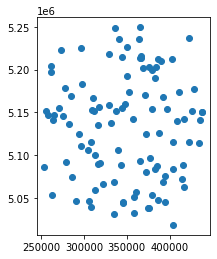

In [12]:
krig_dif.plot()

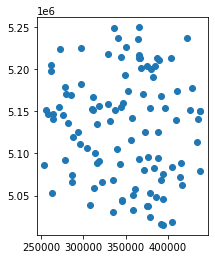

In [16]:
nn_dif.plot()